In [72]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM

from scipy import interpolate
from astropy.table import Table, Column, vstack, join

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]
marker_bins = ['o', 's', 'H', 'D', '+']
msize_bins = [160, 140, 200, 180, 150]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [74]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### DSigma profiles of HSC massive galaxies

In [4]:
# DeltaSigma profiles of HSC massive galaxies
topn_massive = pickle.load(open(os.path.join(res_dir, 'topn_galaxies.pkl'), 'rb'))

dsig_all_1 = topn_massive['logm_100']
dsig_cen_1 = topn_massive['logm_100_cen3']

dsig_all_2 = topn_massive['logm_50_100']
dsig_cen_2 = topn_massive['logm_50_100_cen3']

### DSigma profiles of mock galaxies

In [5]:
sim_dsig_all = Table.read(os.path.join(sim_dir, 'sim_merge_all_dsig.fits'))
sim_dsig_cen = Table.read(os.path.join(sim_dir, 'sim_mdpl2_cen_dsig.fits'))

In [6]:
# Sigma = 0.0
sim_dsig_all_sig0 = sim_dsig_all[sim_dsig_all['scatter'] < 0.01]
sim_dsig_cen_sig0 = sim_dsig_cen[sim_dsig_cen['scatter'] < 0.01]

# Sigma = 0.4
sim_dsig_all_sig4 = sim_dsig_all[sim_dsig_all['scatter'] == 0.4]
sim_dsig_cen_sig4 = sim_dsig_cen[sim_dsig_cen['scatter'] == 0.4]

In [7]:
r_mpc_mod = sim_dsig_all_sig0[0]['r_mpc']

#### DSigma profiles of Cen-only and Cen+Sat samples from the fiducial mock catalog

In [8]:
sat_dir = os.path.join(jianbing.JB_DIR, 'data', 'satellite')

In [9]:
!ls '/Users/song/Dropbox/work/submit/jianbing/data/satellite/'

mstar_cen_0.pickle mstar_cen_2.pickle mstar_gal_0.pickle mstar_gal_2.pickle
mstar_cen_1.pickle mstar_cen_3.pickle mstar_gal_1.pickle mstar_gal_3.pickle


### Estimating the satellite fraction

In [10]:
# Pre-compute
s16a_precompute = os.path.join(data_dir, 'topn_public_s16a_medium_precompute.hdf5')

hsc_pre = Table.read(s16a_precompute, path='hsc')

In [21]:
# logm_max 
logm_max = copy.deepcopy(
    hsc_pre['logm_max', 'cen_mask_1', 'cen_mask_2', 'cen_mask_3'][np.isfinite(hsc_pre['logm_max'])])
logm_max.sort('logm_max')
logm_max.reverse()

In [22]:
print("Bin 1: f_sat = {:5.2f}%".format((~logm_max[0:50]['cen_mask_1']).sum() / 50. * 100.))
print("Bin 2: f_sat = {:5.2f}%".format((~logm_max[50:247]['cen_mask_1']).sum() / 197. * 100.))
print("Bin 3: f_sat = {:5.2f}%".format((~logm_max[247:909]['cen_mask_1']).sum() / 662. * 100.))
print("Bin 4: f_sat = {:5.2f}%".format((~logm_max[909:2073]['cen_mask_1']).sum() / 1165. * 100.))

Bin 1: f_sat =  0.00%
Bin 2: f_sat =  3.55%
Bin 3: f_sat =  4.08%
Bin 4: f_sat =  7.90%


In [23]:
print("Bin 1: f_sat = {:5.2f}%".format((~logm_max[0:50]['cen_mask_2']).sum() / 50. * 100.))
print("Bin 2: f_sat = {:5.2f}%".format((~logm_max[50:247]['cen_mask_2']).sum() / 197. * 100.))
print("Bin 3: f_sat = {:5.2f}%".format((~logm_max[247:909]['cen_mask_2']).sum() / 662. * 100.))
print("Bin 4: f_sat = {:5.2f}%".format((~logm_max[909:2073]['cen_mask_2']).sum() / 1165. * 100.))

Bin 1: f_sat =  0.00%
Bin 2: f_sat =  4.57%
Bin 3: f_sat =  6.04%
Bin 4: f_sat = 12.53%


In [24]:
print("Bin 1: f_sat = {:5.2f}%".format((~logm_max[0:50]['cen_mask_3']).sum() / 50. * 100.))
print("Bin 2: f_sat = {:5.2f}%".format((~logm_max[50:247]['cen_mask_3']).sum() / 197. * 100.))
print("Bin 3: f_sat = {:5.2f}%".format((~logm_max[247:909]['cen_mask_3']).sum() / 662. * 100.))
print("Bin 4: f_sat = {:5.2f}%".format((~logm_max[909:2073]['cen_mask_3']).sum() / 1165. * 100.))

Bin 1: f_sat =  0.00%
Bin 2: f_sat =  3.55%
Bin 3: f_sat =  4.68%
Bin 4: f_sat =  8.84%


### Making the figure

0
1.052578305803864
1.0428120724960015
1.01877284167431
1
1.1158114705140243
1.1147711245284715
1.1489597599961079
2
1.1279344491368322
1.4694129063735035
1.2294490101359405
3
1.197327686303354
1.2648251370087535
1.3285971299751944


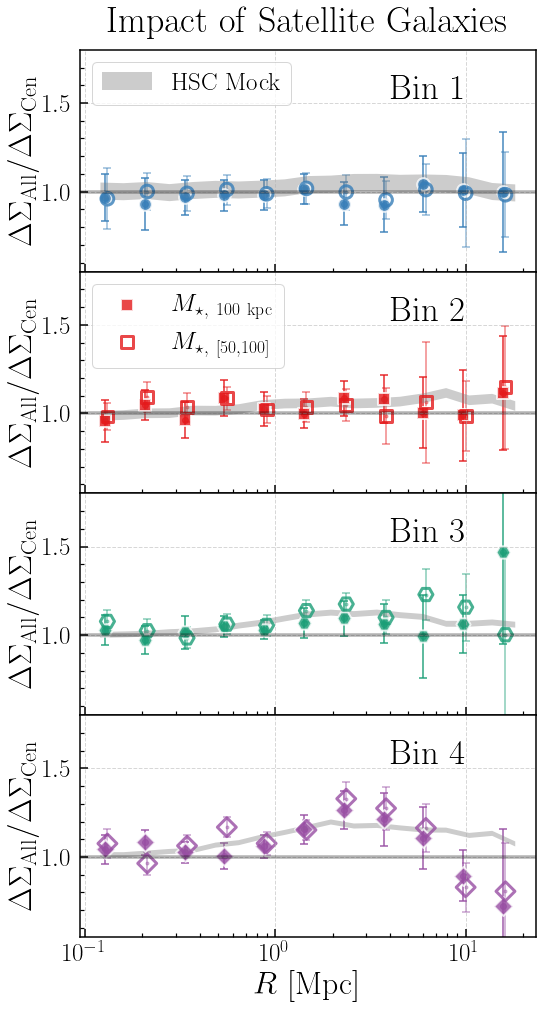

In [25]:
fig = plt.figure(figsize=(7.5, 14.0))
fig.subplots_adjust(
    left=0.15, bottom=0.07, right=0.995, top=0.95, wspace=0, hspace=0)

for bin_num in np.arange(len(dsig_cen_1)):
    
    print(bin_num)
    ax = fig.add_subplot(4, 1, bin_num + 1)
    ax.set_xscale("log", nonpositive='clip')
    ax.axhline(1.0, linewidth=3.5, c='k' ,alpha=0.3)
    
    # Model
    r_mod, dsig_model_all, dsig_model_all_err, _ = pickle.load(
        open(os.path.join(sat_dir, 'mstar_gal_{:d}.pickle'.format(bin_num)), 'rb'))[1]
    r_mod, dsig_model_cen, dsig_model_cen_err, _ = pickle.load(
        open(os.path.join(sat_dir, 'mstar_cen_{:d}.pickle'.format(bin_num)), 'rb'))[1]
    
    if bin_num == 0:
        label_1 = r'$\rm Ideal$'
        label_2 = r'$\rm HSC\ Mock$'
    else:
        label_1, label_2 = '__no_label__', '__no_label__'
        
    # DSigma ratio
    ratio_model = dsig_model_all / dsig_model_cen
    print(np.max(ratio_model))
    
    # Error
    err_model = np.asarray(
        np.sqrt((dsig_model_all_err / dsig_model_all) ** 2 + 
                (dsig_model_cen_err / dsig_model_cen) ** 2))[0]
    
    ax.fill_between(r_mod, ratio_model - err_model, ratio_model + err_model,
                    alpha=0.4, edgecolor='none', linewidth=1.0, label=label_2,
                    facecolor='grey', rasterized=True)
    
    if bin_num == 0:
        ax.legend(loc='upper left', fontsize=25)
        
    # Observation
    r_mpc = dsig_all_1.meta['r_mpc']
    
    if bin_num == 1:
        label_1 = r'$M_{\star,\ 100\ \rm kpc}$'
        label_2 = r'$M_{\star,\ [50,100]}$'
    else:
        label_1, label_2 = '__no_label__', '__no_label__'
    
    # Proxy_1
    dsig_ratio = dsig_all_1[bin_num]['dsigma'] / dsig_cen_1[bin_num]['dsigma']
    print(np.max(dsig_ratio))
    
    # Dsigma Error
    dsig_err_all = dsig_all_1[bin_num]['dsig_err_jk']
    dsig_err_cen = dsig_cen_1[bin_num]['dsig_err_jk']
    err_ratio = np.sqrt((dsig_err_cen / dsig_cen_1[bin_num]['dsigma']) ** 2 + (dsig_err_all / dsig_all_1[bin_num]['dsigma']) ** 2) / 2.0
    
    ax.errorbar(r_mpc, dsig_ratio, yerr=err_ratio, ecolor=color_bins[bin_num], 
                color=color_bins[bin_num], alpha=0.7, 
                capsize=4, capthick=2.0, elinewidth=2.0, label='__no_label__', fmt='o', zorder=0)
    ax.scatter(r_mpc, dsig_ratio, s=msize_bins[bin_num], marker=marker_bins[bin_num], 
               alpha=0.8, facecolor=color_bins[bin_num], edgecolor='w', 
               linewidth=2.0, label=label_1)
    
    # Proxy_2
    dsig_ratio = dsig_all_2[bin_num]['dsigma'] / dsig_cen_2[bin_num]['dsigma']
    print(np.max(dsig_ratio))
    
    # Dsigma Error
    dsig_err_all = dsig_all_2[bin_num]['dsig_err_jk']
    dsig_err_cen = dsig_cen_2[bin_num]['dsig_err_jk']
    err_ratio = np.sqrt((dsig_err_cen / dsig_cen_2[bin_num]['dsigma']) ** 2 + (dsig_err_all / dsig_all_2[bin_num]['dsigma']) ** 2) / 2.0
    
    ax.errorbar(r_mpc * 1.03, dsig_ratio, yerr=err_ratio, ecolor=color_bins[bin_num], 
                color=color_bins[bin_num], alpha=0.4, 
                capsize=4, capthick=2.0, elinewidth=2.0, label='__no_label__', fmt='.', zorder=0)
    ax.scatter(r_mpc * 1.03, dsig_ratio, s=msize_bins[bin_num], marker=marker_bins[bin_num], 
               alpha=0.8, facecolor='none', edgecolor=color_bins[bin_num], 
               linewidth=3.0, label=label_2)
    
    if bin_num == 1:
        ax.legend(loc='best', fontsize=25)
    
    ax.set_ylim(0.55, 1.8)

    _ = ax.text(0.68, 0.78, r'$\rm Bin\ {:1d}$'.format(bin_num + 1), fontsize=35, transform=ax.transAxes)
    _ = ax.set_ylabel(r'$\Delta\Sigma_{\rm All} / \Delta\Sigma_{\rm Cen}$', fontsize=32)
    
    if bin_num == 0:
        _ = ax.set_title(r'$\rm Impact\ of\ Satellite\ Galaxies$', fontsize=36, pad=18)
        
    if bin_num == 3:
        _ = ax.set_xlabel(r'$R\ [\mathrm{Mpc}]$', fontsize=32)
    else:
        ax.set_xticklabels([])

In [26]:
fig.savefig(os.path.join(fig_dir, 'fig_4.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_4.pdf'), dpi=120)

### Making a figure using the regular models with different scatter values

# Bin 0
Maximum ratio for sig=0.0 profiles in Bin 0:  1.008
Maximum ratio for sig=0.4 profiles in Bin 0:  1.081
Maximum ratio for M_max in Bin 0:  1.004
Maximum ratio for M[50,100] in Bin 0:  1.019
# Bin 1
Maximum ratio for sig=0.0 profiles in Bin 1:  1.047
Maximum ratio for sig=0.4 profiles in Bin 1:  1.095
Maximum ratio for M_max in Bin 1:  1.213
Maximum ratio for M[50,100] in Bin 1:  1.149
# Bin 2
Maximum ratio for sig=0.0 profiles in Bin 2:  1.090
Maximum ratio for sig=0.4 profiles in Bin 2:  1.124
Maximum ratio for M_max in Bin 2:  1.100
Maximum ratio for M[50,100] in Bin 2:  1.229
# Bin 3
Maximum ratio for sig=0.0 profiles in Bin 3:  1.172
Maximum ratio for sig=0.4 profiles in Bin 3:  1.198
Maximum ratio for M_max in Bin 3:  1.246
Maximum ratio for M[50,100] in Bin 3:  1.329


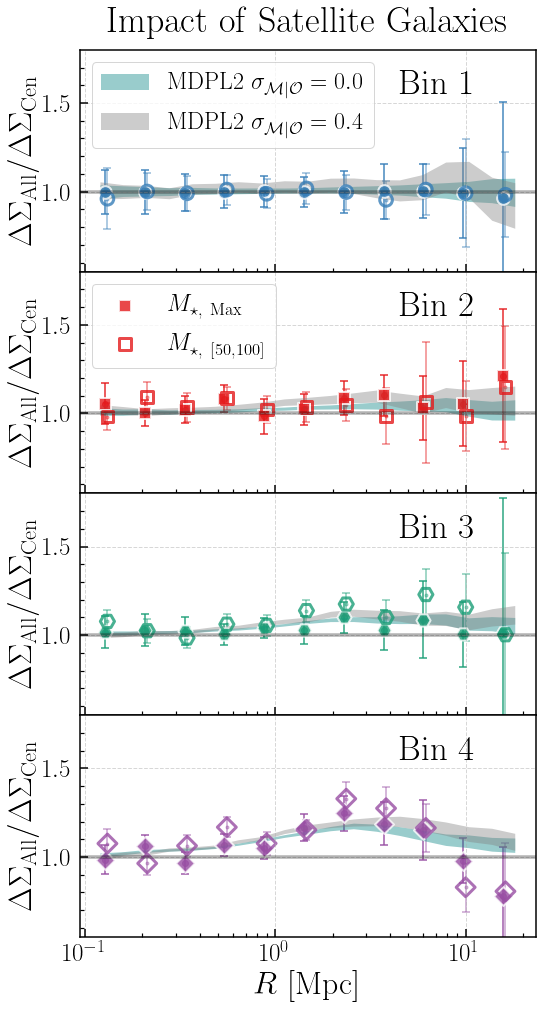

In [29]:
fig = plt.figure(figsize=(7.5, 14.0))
fig.subplots_adjust(
    left=0.15, bottom=0.07, right=0.995, top=0.95, wspace=0, hspace=0)

for bin_num in np.arange(len(dsig_cen_1)):
    
    print("# Bin {:d}".format(bin_num))
    
    ax = fig.add_subplot(4, 1, bin_num + 1)
    ax.set_xscale("log", nonpositive='clip')
    ax.axhline(1.0, linewidth=3.5, c='k' ,alpha=0.3)
    
    # DSigma ratio for sigma=0.0
    mod_sig0_all = sim_dsig_all_sig0[sim_dsig_all_sig0['bin'] == bin_num]
    mod_sig0_cen = sim_dsig_cen_sig0[sim_dsig_all_sig0['bin'] == bin_num]
    ratio_sig0 = np.asarray(mod_sig0_all['dsig'] / mod_sig0_cen['dsig'])[0]
    print("Maximum ratio for sig=0.0 profiles in Bin {:d}: {:6.3f}".format(
        bin_num, np.max(ratio_sig0)))
    
    # Error
    err_sig0 = np.asarray(
        np.sqrt((mod_sig0_all['dsig_err'] / mod_sig0_all['dsig']) ** 2 + 
                (mod_sig0_cen['dsig_err'] / mod_sig0_cen['dsig']) ** 2))[0]
    
    if bin_num == 0:
        label_1 = r'$\rm MDPL2\ \sigma_{\mathcal{M}|\mathcal{O}}=0.0$'
        label_2 = r'$\rm MDPL2\ \sigma_{\mathcal{M}|\mathcal{O}}=0.4$'
    else:
        label_1, label_2 = '__no_label__', '__no_label__'
        
    ax.fill_between(r_mpc_mod, ratio_sig0 - err_sig0, ratio_sig0 + err_sig0,
                    alpha=0.4, edgecolor='none', linewidth=1.0, label=label_1,
                    facecolor='teal', rasterized=True)
    
    # DSigma ratio for sigma=0.4
    mod_sig4_all = sim_dsig_all_sig4[sim_dsig_all_sig4['bin'] == bin_num]
    mod_sig4_cen = sim_dsig_cen_sig4[sim_dsig_all_sig4['bin'] == bin_num]
    ratio_sig4 = np.asarray(mod_sig4_all['dsig'] / mod_sig4_cen['dsig'])[0]
    print("Maximum ratio for sig=0.4 profiles in Bin {:d}: {:6.3f}".format(
        bin_num, np.max(ratio_sig4)))
    
    # Error
    err_sig4 = np.asarray(
        np.sqrt((mod_sig4_all['dsig_err'] / mod_sig4_all['dsig']) ** 2 + 
                (mod_sig4_cen['dsig_err'] / mod_sig4_cen['dsig']) ** 2))[0]
    
    ax.fill_between(r_mpc_mod, ratio_sig4 - err_sig4, ratio_sig4 + err_sig4,
                    alpha=0.4, edgecolor='none', linewidth=1.0, label=label_2,
                    facecolor='grey', rasterized=True)
    
    if bin_num == 0:
        ax.legend(loc='best', fontsize=24)
        
    # Observation
    r_mpc = dsig_all_1.meta['r_mpc']
    
    if bin_num == 1:
        label_1 = r'$M_{\star,\ \rm Max}$'
        label_2 = r'$M_{\star,\ [50,100]}$'
    else:
        label_1, label_2 = '__no_label__', '__no_label__'
    
    # Proxy_1: logM_max
    dsig_ratio = dsig_all_1[bin_num]['dsigma'] / dsig_cen_1[bin_num]['dsigma']
    print("Maximum ratio for M_max in Bin {:d}: {:6.3f}".format(
        bin_num, np.max(dsig_ratio)))
    
    # Dsigma Error
    dsig_err_all = dsig_all_1[bin_num]['dsig_err_jk']
    dsig_err_cen = dsig_cen_1[bin_num]['dsig_err_jk']
    err_ratio = np.sqrt(
        (dsig_err_cen / dsig_cen_1[bin_num]['dsigma']) ** 2 + 
        (dsig_err_all / dsig_all_1[bin_num]['dsigma']) ** 2) / 2.0
    
    ax.errorbar(r_mpc, dsig_ratio, yerr=err_ratio, ecolor=color_bins[bin_num], 
                color=color_bins[bin_num], alpha=0.7, 
                capsize=4, capthick=2.0, elinewidth=2.0, label='__no_label__', fmt='o', zorder=0)
    ax.scatter(r_mpc, dsig_ratio, s=msize_bins[bin_num], marker=marker_bins[bin_num], 
               alpha=0.8, facecolor=color_bins[bin_num], edgecolor='w', 
               linewidth=2.0, label=label_1)
    
    # Proxy_2: logM_[50, 100]
    dsig_ratio = dsig_all_2[bin_num]['dsigma'] / dsig_cen_2[bin_num]['dsigma']
    print("Maximum ratio for M[50,100] in Bin {:d}: {:6.3f}".format(
        bin_num, np.max(dsig_ratio)))
    
    # Dsigma Error
    dsig_err_all = dsig_all_2[bin_num]['dsig_err_jk']
    dsig_err_cen = dsig_cen_2[bin_num]['dsig_err_jk']
    err_ratio = np.sqrt(
        (dsig_err_cen / dsig_cen_2[bin_num]['dsigma']) ** 2 + 
        (dsig_err_all / dsig_all_2[bin_num]['dsigma']) ** 2) / 2.0
    
    ax.errorbar(r_mpc * 1.03, dsig_ratio, yerr=err_ratio, ecolor=color_bins[bin_num], 
                color=color_bins[bin_num], alpha=0.4, 
                capsize=4, capthick=2.0, elinewidth=2.0, label='__no_label__', fmt='.', zorder=0)
    ax.scatter(r_mpc * 1.03, dsig_ratio, s=msize_bins[bin_num], marker=marker_bins[bin_num], 
               alpha=0.8, facecolor='none', edgecolor=color_bins[bin_num], 
               linewidth=3.0, label=label_2)
    
    if bin_num == 1:
        ax.legend(loc='best', fontsize=24)
    
    ax.set_ylim(0.55, 1.8)

    _ = ax.text(0.70, 0.80, r'$\rm Bin\ {:1d}$'.format(bin_num + 1), 
                fontsize=35, transform=ax.transAxes)
    _ = ax.set_ylabel(r'$\Delta\Sigma_{\rm All} / \Delta\Sigma_{\rm Cen}$', fontsize=32)
    
    if bin_num == 0:
        _ = ax.set_title(r'$\rm Impact\ of\ Satellite\ Galaxies$', fontsize=36, pad=18)
        
    if bin_num == 3:
        _ = ax.set_xlabel(r'$R\ [\mathrm{Mpc}]$', fontsize=32)
    else:
        ax.set_xticklabels([])

In [4]:
from jianbing import scatter

In [75]:
def sigo_to_sigm(sigo, alpha=1.0, beta2=2.959):
    """Convert the scatter of observable to the scatter of halo mass."""
    return sigo / np.sqrt(beta2 * (sigo ** 2) + (alpha ** 2))

In [81]:
sigo_to_sigm(0.3, alpha=0.36, beta2=2.959)

0.47678547786950437

In [85]:
sigo_to_sigm(0.25, alpha=0.56, beta2=2.959)

0.35407159952536726

In [7]:
1 / 1.3

0.7692307692307692